#### Importación y carga de Datos

In [22]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [25]:
# Cargar los datos
ruta = '../data/airline_passenger_satisfaction.csv'
ruta_nuevoCSV = "../data/airline_cleaned.csv"
df = pd.read_csv(ruta, sep=',')

# Mostrar todas las filas y columnas (opcional, puede ser comentado)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Eliminamos la columna Unnamed: 0 del Dataframe
df = df.drop('Unnamed: 0', axis=1)  # Corregimos el eje a 1 para eliminar una columna

print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:", df.head(5))
print("\nColumnas de dataset:", df.columns)

Dimensiones del dataset: (103904, 24)

Primeras 5 filas del dataset:        id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online

#### Limpieza de Datos

In [11]:
# Verificar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction               

#### Imputar los valores faltantes con KNN

In [12]:
from sklearn.impute import KNNImputer
numeric_cols = df.select_dtypes(include=np.number).columns

# Crear un objeto KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Imputar solo las columnas numéricas
df_numeric = df[numeric_cols]
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Concatenar las columnas numéricas imputadas con las columnas categóricas originales
df = pd.concat([df_imputed_numeric, df.select_dtypes(exclude=np.number)], axis=1)
df.head(2)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,70172.0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,5047.0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [13]:
# Verificar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
id                                   0
Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender                               0
Customer Type                        0
Type of Travel                       0
Class                                0
satisfaction                         0
dtype: int64


In [14]:
# Eliminar duplicados
df_cleaned = df.drop_duplicates()
print(f"\nFilas eliminadas: {len(df) - len(df_cleaned)}")


Filas eliminadas: 0


#### Visualización de Datos

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11664\1507872240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11664\1507872240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11664\1507872240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11664\1507872240.py:9: FutureWarning

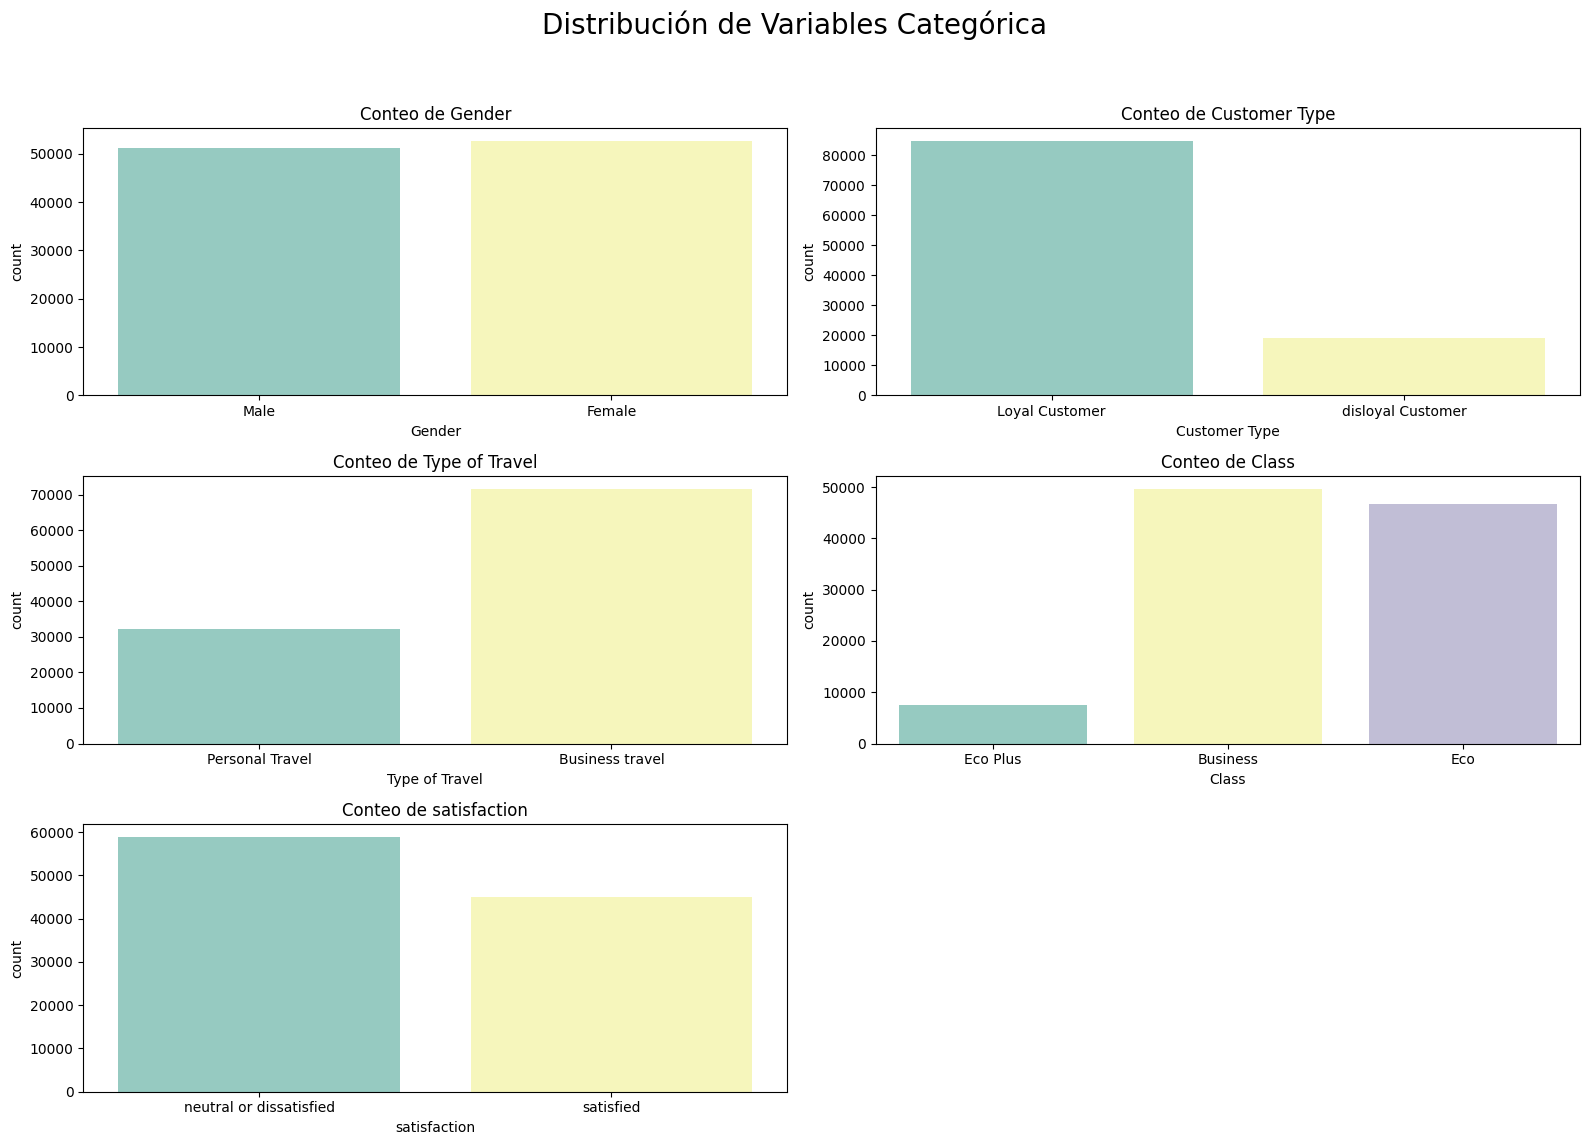

In [15]:
# Gráfico de Barras para variables categóricas
categorical_columns = df.select_dtypes(include='object').columns.tolist() 

plt.figure(figsize=(16, 12))
plt.suptitle('Distribución de Variables Categórica', fontsize=20)

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[column], palette='Set3')
    plt.title(f'Conteo de {column}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

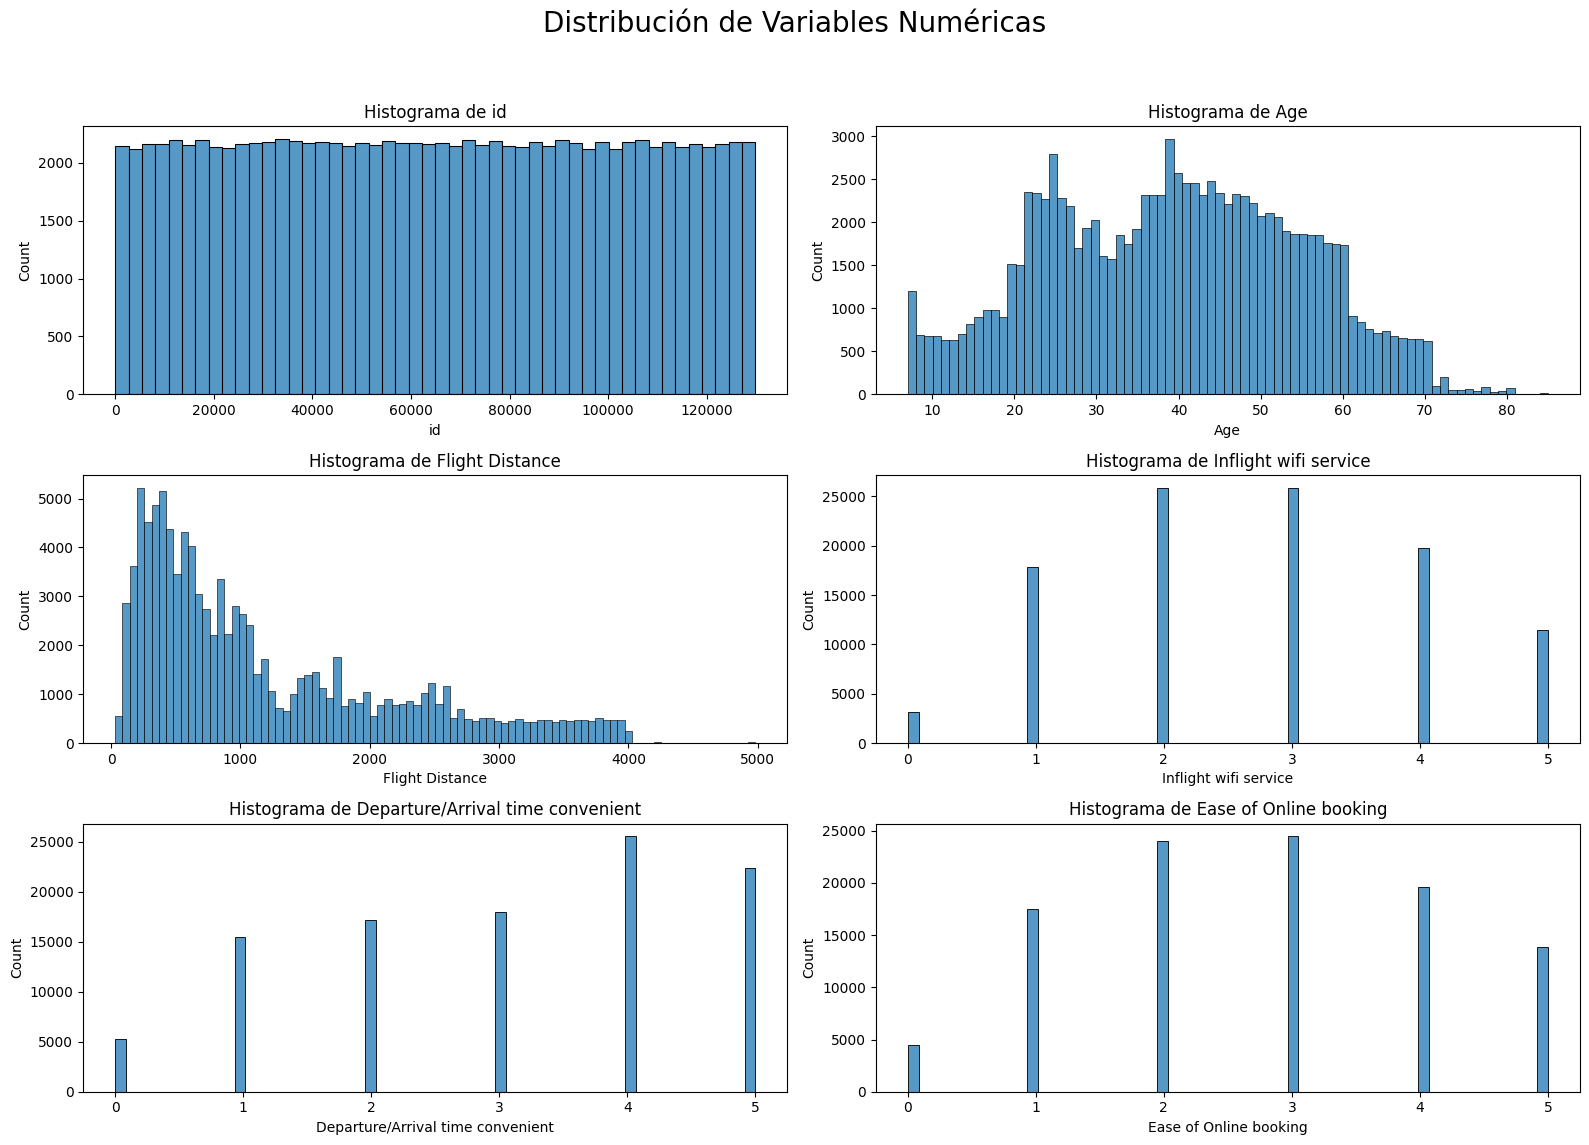

In [16]:
# Obtener las columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(16, 12))
plt.suptitle('Distribución de Variables Numéricas', fontsize=20)


num_subplots = min(len(numeric_columns), 6)  # Limit to 6 subplots

for i in range(1, num_subplots + 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=numeric_columns[i-1])  # Access columns by index
    plt.title(f'Histograma de {numeric_columns[i-1]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Detección de outliers

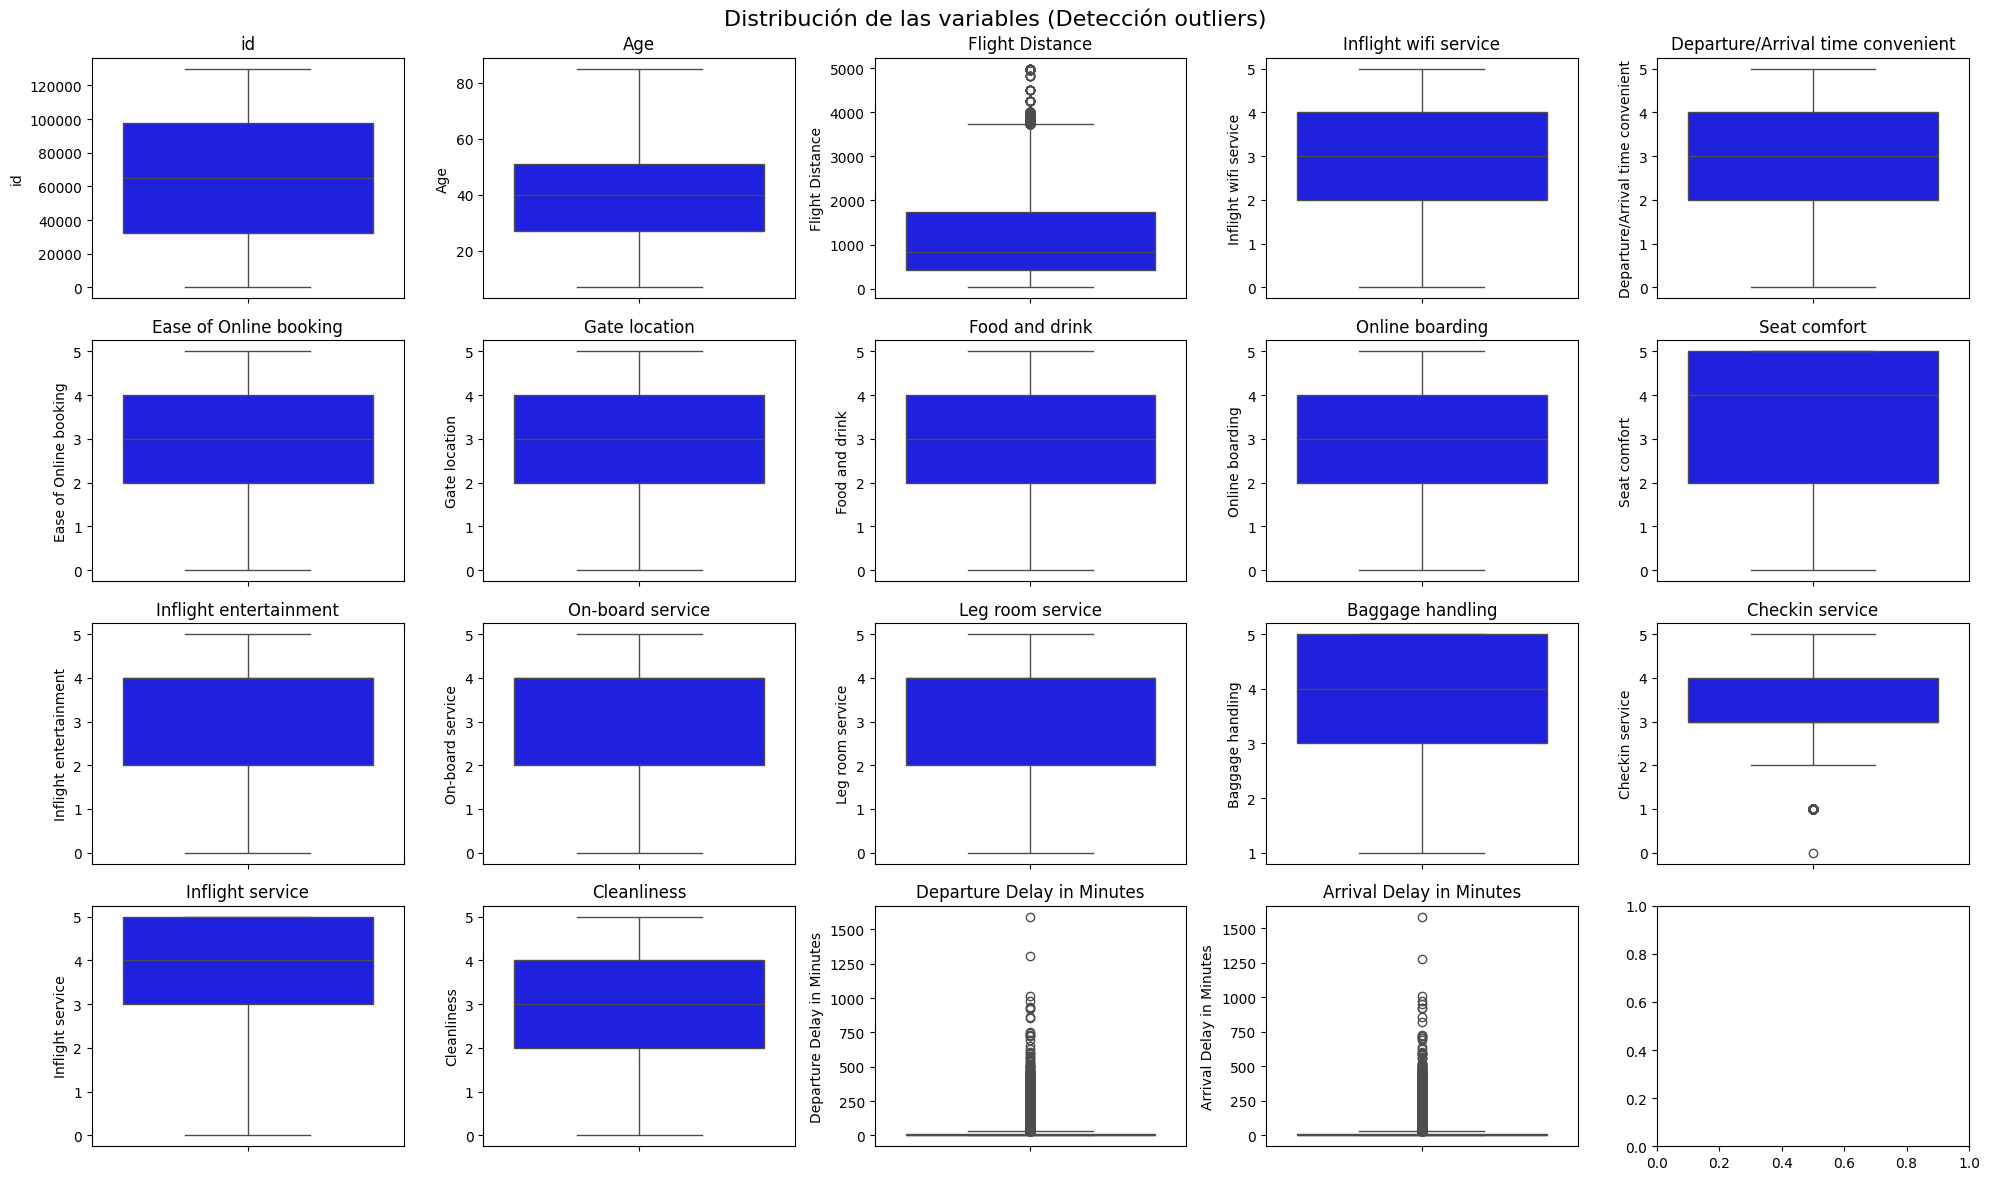

In [17]:
## Obtener las columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Calcular el número de filas y columnas necesarias
num_cols = len(numeric_cols)
num_rows = (num_cols - 1) // 5 + 1

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows*3))

# Crear un boxplot para cada columna en un subplot diferente
for i, col in enumerate(numeric_cols):
    row = i // 5
    col_idx = i % 5
    sns.boxplot(data=df[col], ax=axes[row, col_idx], color='blue')
    axes[row, col_idx].set_title(col)
    
# Agregar título general a la figura
fig.suptitle('Distribución de las variables (Detección outliers)', fontsize=16)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [18]:
# Eliminamos la columna Unnamed: 0 del Dataframe
df = df.drop('id', axis=1)  # Corregimos el eje a 1 para eliminar una columna
print(df.describe())

                 Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%            

#### Correlación

In [19]:
# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Convertir columnas categóricas a numéricas
categorical_columns = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes

# Calcular la matriz de correlación
corr_matrix = df.corr()
print(f"Matriz de Correlación\n {corr_matrix}")

Matriz de Correlación
                                         Age  Flight Distance  \
Age                                1.000000         0.099461   
Flight Distance                    0.099461         1.000000   
Inflight wifi service              0.017859         0.007131   
Departure/Arrival time convenient  0.038125        -0.020043   
Ease of Online booking             0.024842         0.065717   
Gate location                     -0.001330         0.004793   
Food and drink                     0.023000         0.056994   
Online boarding                    0.208939         0.214869   
Seat comfort                       0.160277         0.157333   
Inflight entertainment             0.076444         0.128740   
On-board service                   0.057594         0.109526   
Leg room service                   0.040583         0.133916   
Baggage handling                  -0.047529         0.063184   
Checkin service                    0.035482         0.073072   
Inflight service 

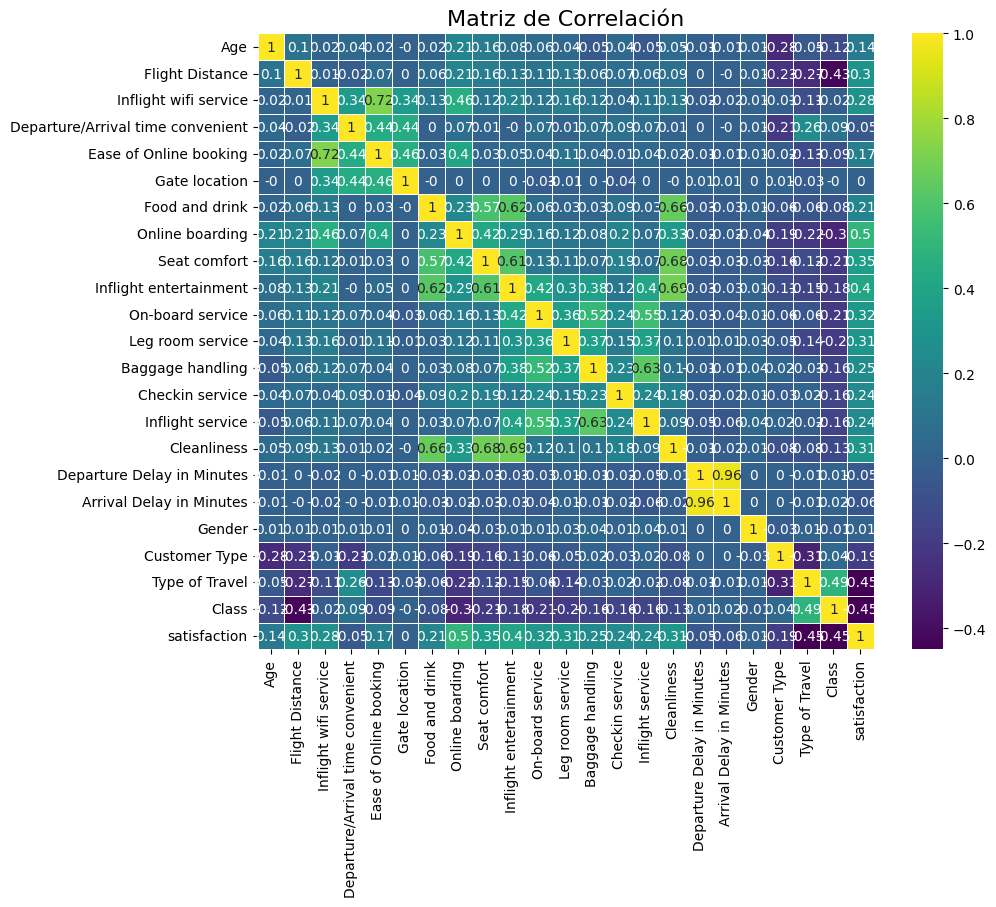

In [20]:
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='viridis', cbar=True, square=True, linewidths=.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # Para el análisis de multicolinealidad
import warnings
warnings.filterwarnings('ignore')  # Supresión de todas las advertencias

# Análisis de multicolinealidad
X = df.drop('satisfaction', axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nFactores de Inflación de la Varianza (VIF):")
print(vif_data)


Factores de Inflación de la Varianza (VIF):
                              Feature        VIF
0                                 Age   7.573147
1                     Flight Distance   3.039382
2               Inflight wifi service  12.761390
3   Departure/Arrival time convenient   8.383984
4              Ease of Online booking  13.168976
5                       Gate location   9.008873
6                      Food and drink  14.117648
7                     Online boarding  13.218164
8                        Seat comfort  18.365270
9              Inflight entertainment  27.586849
10                   On-board service  13.845218
11                   Leg room service   9.499386
12                   Baggage handling  19.369406
13                    Checkin service   9.416655
14                   Inflight service  21.200481
15                        Cleanliness  20.728933
16         Departure Delay in Minutes  16.154411
17           Arrival Delay in Minutes  16.209959
18                      

In [27]:
# Guardar los datos estandarizados para posteriores análisis
df.to_csv(ruta_nuevoCSV, index=False) 
